# Part 2: Data visualization


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import requests
import pandas as pd
import numpy as np

## 2.1: Import CSV files

In [10]:
md_sac = pd.read_csv('/Users/apple/Desktop/STA141B/Final/Data/sacramento',encoding='gb2312')
md_sac['date']= range(1,1828)

md_dev = pd.read_csv('/Users/apple/Desktop/STA141B/Final/Data/Denver',encoding='gb2312')
md_dev['date']= range(1,1828)

md_ind = pd.read_csv('/Users/apple/Desktop/STA141B/Final/Data/Indianaplis',encoding='gb2312')
md_ind['date']= range(1,1828)

md_tah = pd.read_csv('/Users/apple/Desktop/STA141B/Final/Data/Lake_Tahoe',encoding='gb2312')
md_tah['date']= range(1,1828)

md_vgs = pd.read_csv('/Users/apple/Desktop/STA141B/Final/Data/Las_Vegas',encoding='gb2312')
md_vgs['date']= range(1,1828)

## 2.2: Define Humidity Plot

In [11]:
def hum_curve(data):
    """humidity curve"""
    date = list(data['date'])
    hum = list(data['humidity'])
    
    for i in range(0,1827):
        if math.isnan(hum[i]) == True:
            hum[i] = hum[i-1]
            
    hum_ave = sum(hum)/1827
    hum_max = max(hum)
    hum_max_hour = date[hum.index(hum_max)]	# max
    hum_min = min(hum)
    hum_min_hour = date[hum.index(hum_min)]	# min
    x = []
    y = []
    
    for i in range(1, 1827):
        x.append(i)
        y.append(hum[date.index(i)])
    
    w = [1,366,731,1096,1461,1827]
    plt.figure(2)
    plt.plot(x,y,color='blue',label='humidity')
    plt.scatter(x,y,color='blue')
    plt.plot([0, 1826], [hum_ave, hum_ave], c='red', linestyle='--',label='average humidity')
    plt.text(hum_max_hour+0.15, hum_max+0.15, str(hum_max), ha='center', va='bottom', fontsize=10.5)
    plt.text(hum_min_hour+0.15, hum_min+0.15, str(hum_min), ha='center', va='bottom', fontsize=10.5)
    plt.xticks(w)
    plt.legend()
    plt.title('Humidity Curve')
    plt.xlabel('Days')
    plt.ylabel('Humidity Percentage')
    plt.show()

## 2.3: Define High and Low Temperature Plot

In [12]:
def tem_curve(data):
    """High and low temperature changing curve"""
    
    date = list(data['date'])
    tem_low = list(data['min_temp'])
    tem_high = list(data['max_temp'])
    
    for i in range(0,1827):
        if math.isnan(tem_low[i]) == True:
            tem_low[i] = tem_low[i-1]
        if math.isnan(tem_high[i]) == True:
            tem_high[i] = tem_high[i-1]

    for i in range(0,1827):
        if tem_low[i] <= -20:
            tem_low[i] = tem_low[i+365]

    tem_high_ave = sum(tem_high)/1827
    tem_low_ave = sum(tem_low)/1827 

    tem_max = max(tem_high)
    tem_max_date = tem_high.index(tem_max)
    tem_min = min(tem_low)
    tem_min_date = tem_low.index(tem_min)

    w = [1,366,731,1096,1461,1827]
    x = range(1,1828)
    plt.figure(1)
    plt.plot(x,tem_high,color='red',label='High Temperature')
    plt.scatter(x,tem_high,color='red')
    plt.plot(x,tem_low,color='blue',label='Low Temperature')
    plt.scatter(x,tem_low,color='blue')
    plt.plot([1, 1827], [tem_high_ave, tem_high_ave], c='black', linestyle='--') 
    plt.plot([1, 1827], [tem_low_ave, tem_low_ave], c='black', linestyle='--')
    plt.legend()
    plt.text(tem_max_date+0.15, tem_max+0.15, str(tem_max), ha='center', va='bottom', fontsize=10.5)
    plt.text(tem_min_date+0.15, tem_min+0.15, str(tem_min), ha='center', va='bottom', fontsize=10.5)
    plt.xticks(w)
    plt.title('High and low temperature changing curve')
    plt.xlabel('Days')
    plt.ylabel('Centigrade/℃')
    plt.show()

## 2.4: Define Wind Plot

In [13]:
def wind_radar(data):
    """wind radar plot"""
    wind = list(data['wind_direction'])
    wind_speed = list(data['wind_speed'])
    for i in range(0,1827):
        if wind[i] < 46:
            wind[i] = 45
        elif wind[i] < 91:
            wind[i] = 90
        elif wind[i] < 136:
            wind[i] = 135
        elif wind[i] < 181:
            wind[i] = 180
        elif wind[i] < 226:
            wind[i] = 225
        elif wind[i] < 271:
            wind[i] = 270
        elif wind[i] < 316:
            wind[i] = 315
        elif wind[i] < 361:
            wind[i] = 360
            
    degs = np.arange(45,361,45)
    temp = []
    
    for deg in degs:
        speed = []
        for i in range(0,1827):
            if wind[i] == deg:
                speed.append(wind_speed[i])
        if len(speed) == 0:
            temp.append(0)
        else:
            temp.append(sum(speed)/len(speed))
    
    N = 8
    theta = np.arange(0.+np.pi/8,2*np.pi+np.pi/8,2*np.pi/8)

    radii = np.array(temp)

    plt.axes(polar=True)

    colors = [(1-x/max(temp), 1-x/max(temp),0.6) for x in radii]
    plt.bar(theta,radii,width=(2*np.pi/N),bottom=0.0,color=colors)
    plt.title('Wind speed radar plot',x=0.2,fontsize=20)
    plt.show()

## 2.5: Define Air Pressure Plot

In [14]:
def air_curve(data):
    """air pressure"""
    date = list(data['date'])
    air = list(data['air_pressure'])
       
    air_ave = sum(air)/1827
    air_max = max(air)
    air_max_date = date[air.index(air_max)]
    air_min = min(air)
    air_min_date = date[air.index(air_min)]

    x = []
    y = []
    ny = []
    nx = []
    
    for i in range(1,21):
        up_bound = (91*i)
        low_bond = up_bound - 90
        for k in range(low_bond, up_bound):
            y.append(air[date.index(k)])
        ap = sum(y)/91
        ny.append(ap)
        y = [] 
        nx.append(i)

    plt.figure(3)
    for i in range(0,20):
        if ny[i] <= 950:
            plt.bar(nx[i],ny[i],color='lightgreen',width=0.7)# lv1
        elif ny[i] <= 1000:
            plt.bar(nx[i],ny[i],color='wheat',width=0.7) # lv2
        elif ny[i] > 1000:
            plt.bar(nx[i],ny[i],color='maroon',width=0.7)# lv3
            
    plt.plot([0, 20], [air_ave, air_ave], c='black', linestyle='--')
    plt.text(4, air_max+0.15, str(air_max), ha='left', va='top', fontsize=10.5)
    plt.text(4, air_min+0.15, str(air_min), ha='left', va='top', fontsize=10.5) 
    plt.xticks(nx)
    plt.title('air pressure plot')
    plt.xlabel('Quarter-every 4 months')
    plt.ylabel('Air pressure measured in mbar')
    plt.show()

## 2.6: Print Plots

In [15]:
def print_plot(data):
    
    hum_curve(data)
    tem_curve(data)
    wind_radar(data)
    air_curve(data)

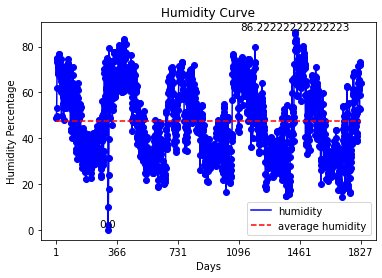

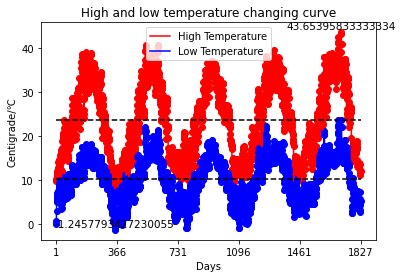

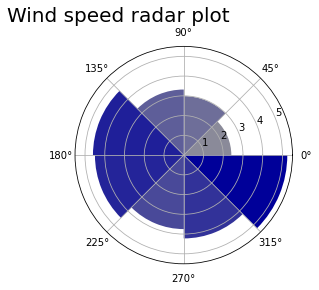

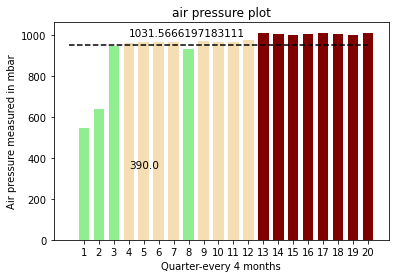

In [16]:
print_plot(md_sac)

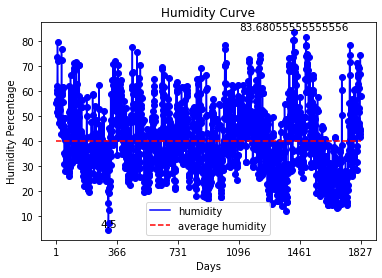

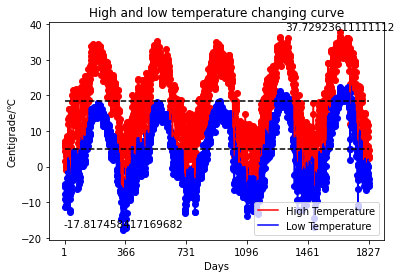

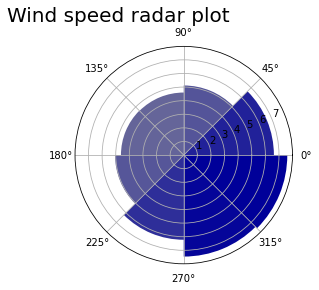

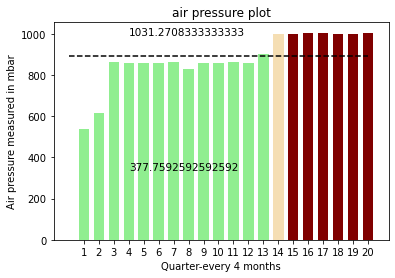

In [15]:
print_plot(md_dev)

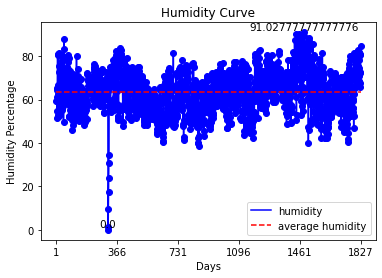

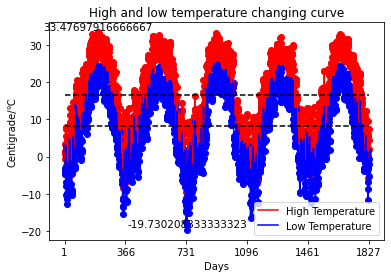

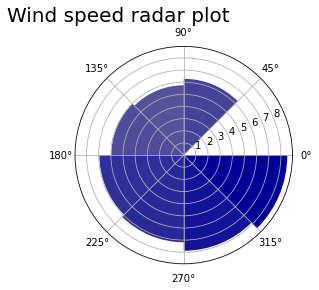

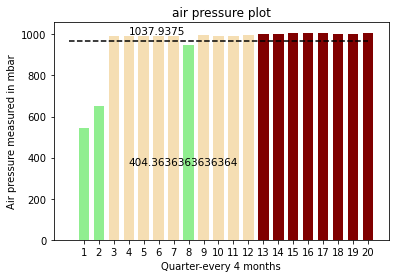

In [16]:
print_plot(md_ind)

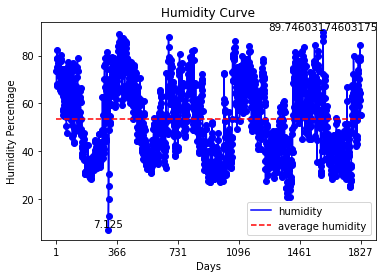

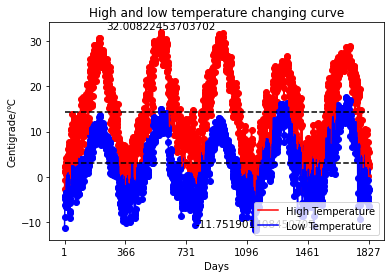

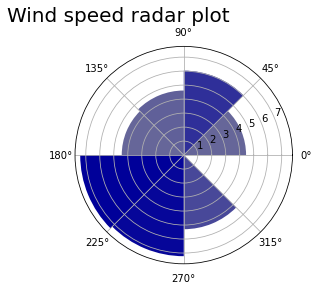

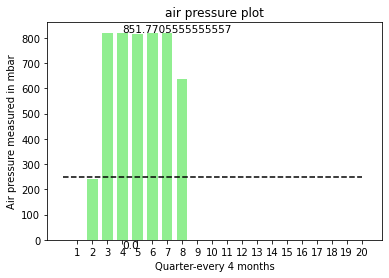

In [17]:
print_plot(md_tah)

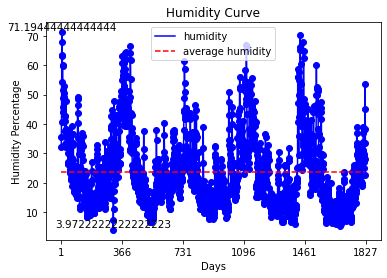

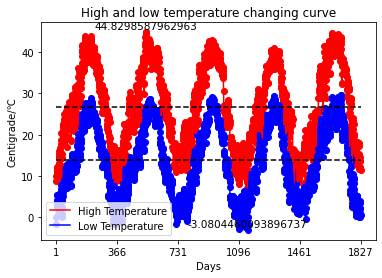

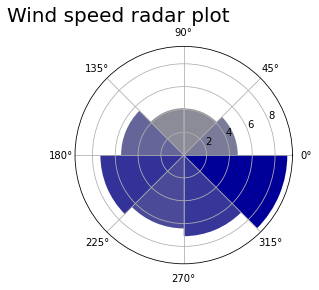

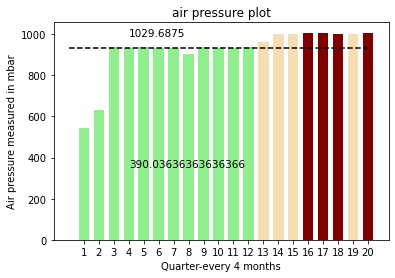

In [18]:
print_plot(md_vgs)